In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

# Continuous National Household Sample Survey - Continuous PNAD

The Continuous National Household Sample Survey (PNADc) is a survey carried out by the Brazilian Institute of Geography and Statistics (IBGE) on a sample of Brazilian households that investigates various socioeconomic characteristics of society, such as population, education, work, income, housing, social security, migration, fertility, marriage, health, nutrition, etc., among others, that are included according to the Brazilian government needs. The research is carried out in all regions of Brazil, including the rural areas of Rondônia, Acre, Amazonas, Roraima, Pará and Amapá.

More info and the dataset can be found at: https://www.ibge.gov.br/en/statistics/multi-domain/living-conditions-poverty-and-inequality/18083-annual-dissemination-pnadc3.html?=&t=o-que-e]

The full dataset contains over 300 variables. So, for the purpose of basic income related analysis, only 10 variables were croped from years 2019 - 2021 datasets.

## Load dataset

In [2]:
df = pd.read_csv("pnad_clean.csv")

## Data overview

In [3]:
pnad = df.copy()
pnad.head()

,year,uf,sex,age,skin_color,literate,years_in_education,income,weekly_working_hours,sample_weight
0,2021,Rondônia,Female,39,Brown,Yes,5.0,1045.0,40.0,107.066353
1,2021,Rondônia,Female,20,Brown,Yes,10.0,1045.0,40.0,107.066353
2,2021,Rondônia,Female,16,Brown,Yes,10.0,NaN,NaN,107.066353
3,2021,Rondônia,Male,73,Brown,Yes,12.0,NaN,NaN,107.066353
4,2021,Rondônia,Female,59,Brown,Yes,12.0,NaN,NaN,107.066353


In [4]:
pnad[pnad.duplicated(keep=False)]

,year,uf,sex,age,skin_color,literate,years_in_education,income,weekly_working_hours,sample_weight
125,2021,Rondônia,Female,13,Brown,Yes,7.0,NaN,NaN,281.776318
126,2021,Rondônia,Female,13,Brown,Yes,7.0,NaN,NaN,281.776318
140,2021,Rondônia,Female,0,White,NaN,NaN,NaN,NaN,203.841617
141,2021,Rondônia,Female,0,White,NaN,NaN,NaN,NaN,203.841617
683,2021,Rondônia,Female,15,Brown,Yes,9.0,NaN,NaN,157.161742
...,...,...,...,...,...,...,...,...,...,...
1465703,2021,Distrito Federal,Male,13,White,Yes,6.0,NaN,NaN,225.128002
1465753,2021,Distrito Federal,Female,28,Black,Yes,15.0,2800.0,40.0,355.338844
1465768,2021,Distrito Federal,Female,28,Black,Yes,15.0,2800.0,40.0,355.338844
1466305,2021,Distrito Federal,Female,18,Black,Yes,12.0,NaN,10.0,473.271230


In [5]:
pnad.isna().sum() / pnad.shape[0]

year                    0.000000
uf                      0.000000
sex                     0.000000
age                     0.000000
skin_color              0.000000
literate                0.055769
years_in_education      0.055769
income                  0.615561
weekly_working_hours    0.601007
sample_weight           0.000000
dtype: float64

In [6]:
pnad.shape

(1466395, 10)

In [7]:
pnad.describe()

,year,age,years_in_education,income,weekly_working_hours,sample_weight
count,1.466395e+06,1.466395e+06,1.384616e+06,563740.000000,585082.000000,1.466395e+06
mean,2.020758e+03,3.689794e+01,8.478837e+00,2247.115236,36.974209,5.785415e+02
std,4.285277e-01,2.198684e+01,4.885813e+00,3798.093430,14.509763,7.373934e+02
min,2.020000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,3.130796e+00
25%,2.021000e+03,1.800000e+01,5.000000e+00,960.000000,30.000000,2.119707e+02
50%,2.021000e+03,3.600000e+01,9.000000e+00,1350.000000,40.000000,3.774626e+02
75%,2.021000e+03,5.400000e+01,1.200000e+01,2400.000000,44.000000,6.827572e+02
max,2.021000e+03,1.120000e+02,1.600000e+01,310000.000000,120.000000,5.338270e+04


In [8]:
pnad.dtypes

year                      int64
uf                       object
sex                      object
age                       int64
skin_color               object
literate                 object
years_in_education      float64
income                  float64
weekly_working_hours    float64
sample_weight           float64
dtype: object

In [9]:
pnad.isna().sum()

year                         0
uf                           0
sex                          0
age                          0
skin_color                   0
literate                 81779
years_in_education       81779
income                  902655
weekly_working_hours    881313
sample_weight                0
dtype: int64

## Univariate Analysis

In [10]:
pnad[['age', 'literate', 'years_in_education', 'income', 'weekly_working_hours']].describe()

,age,years_in_education,income,weekly_working_hours
count,1.466395e+06,1.384616e+06,563740.000000,585082.000000
mean,3.689794e+01,8.478837e+00,2247.115236,36.974209
std,2.198684e+01,4.885813e+00,3798.093430,14.509763
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.800000e+01,5.000000e+00,960.000000,30.000000
50%,3.600000e+01,9.000000e+00,1350.000000,40.000000
75%,5.400000e+01,1.200000e+01,2400.000000,44.000000
max,1.120000e+02,1.600000e+01,310000.000000,120.000000


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'years_in_education'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'weekly_working_hours'}>,
        <AxesSubplot:title={'center':'sample_weight'}>]], dtype=object)

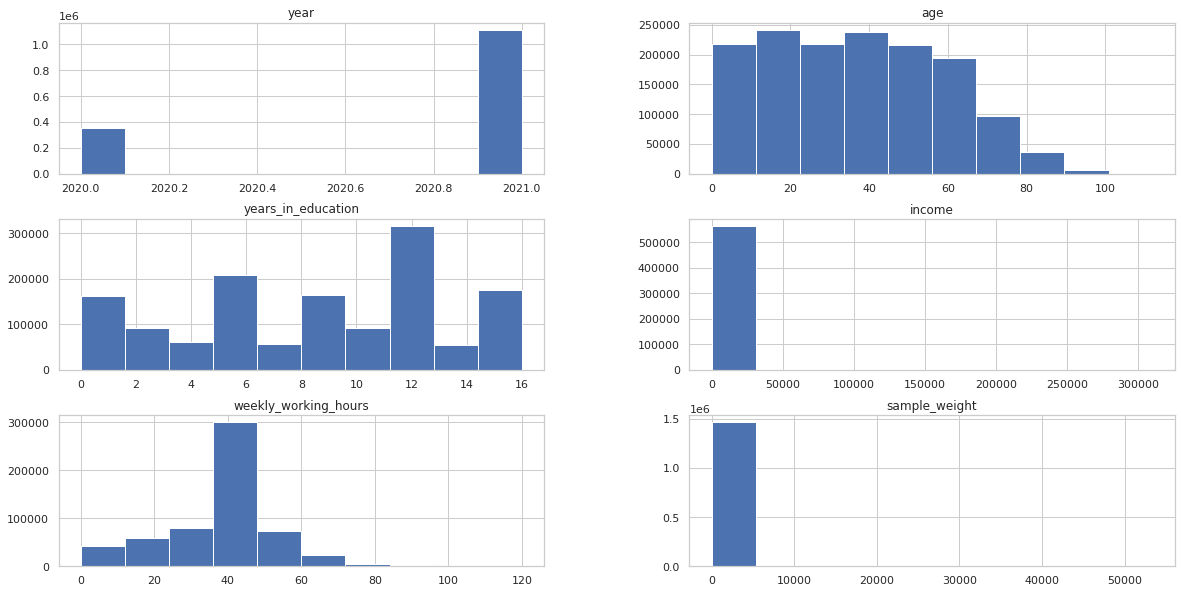

In [11]:
sns.set(style='whitegrid')
pnad.hist(figsize = (20, 10))

In [12]:
pnad.sex.value_counts() / pnad.shape[0]

Female    0.517329
Male      0.482671
Name: sex, dtype: float64

In [13]:
pnad.skin_color.value_counts() / pnad.shape[0]

Brown         0.509667
White         0.398747
Black         0.082280
Yellow        0.004878
Indigenous    0.004244
Ignored       0.000185
Name: skin_color, dtype: float64

In [14]:
pnad.years_in_education.value_counts() / pnad.shape[0]

12.0    0.215056
16.0    0.104905
5.0     0.087059
0.0     0.083202
9.0     0.074260
6.0     0.054948
4.0     0.041157
7.0     0.039234
8.0     0.038535
3.0     0.035229
10.0    0.031688
11.0    0.030668
1.0     0.028192
2.0     0.028047
13.0    0.021647
14.0    0.015713
15.0    0.014692
Name: years_in_education, dtype: float64

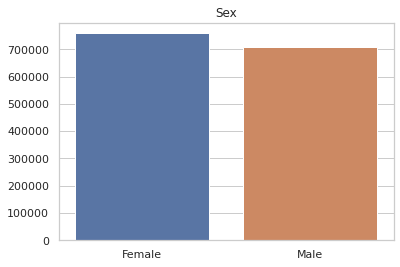

In [15]:
sex = sns.countplot(x = pnad.sex)
sex.set(xlabel = '', ylabel = '', title = 'Sex')
plt.show(sex)

<AxesSubplot:title={'center':'Skin Color'}>

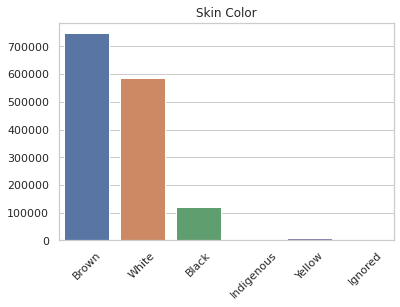

In [16]:
skin_color = sns.countplot(x = pnad.skin_color)
skin_color.set(xlabel = '', ylabel = '', title = 'Skin Color')
plt.xticks(rotation=45)
skin_color

### Summary
Considering the wage earner part of Brazilian population:
- ~90% of the popularion is white and brown.
- ~50% has superior education.
- There are about 17% more males in the working force

## Bivariate Analysis

<AxesSubplot:title={'center':'Income by age'}, xlabel='Age', ylabel='Income'>

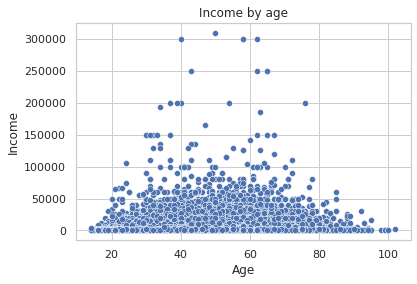

In [17]:
income_by_age = sns.scatterplot(x = pnad.age, y = pnad.income)
income_by_age.set(xlabel = 'Age', ylabel = 'Income', title = 'Income by age')
income_by_age

<AxesSubplot:title={'center':'Skin Color'}>

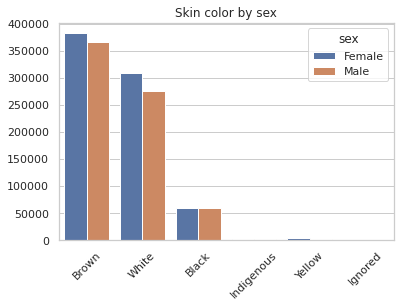

In [18]:
skin_color_by_sex = sns.countplot(x = pnad.skin_color, hue = pnad.sex)
skin_color_by_sex.set(xlabel = '', ylabel = '', title = 'Skin color by sex')
plt.xticks(rotation=45)
skin_color

<AxesSubplot:title={'center':'Income by sex'}>

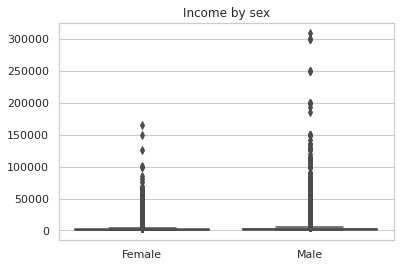

In [19]:
income_by_sex = sns.boxplot(x = pnad.sex, y = pnad.income)
income_by_sex.set(xlabel = '', ylabel = '', title = 'Income by sex')
income_by_sex

In [20]:
pnad[['income', 'age']].describe()

,income,age
count,563740.000000,1.466395e+06
mean,2247.115236,3.689794e+01
std,3798.093430,2.198684e+01
min,0.000000,0.000000e+00
25%,960.000000,1.800000e+01
50%,1350.000000,3.600000e+01
75%,2400.000000,5.400000e+01
max,310000.000000,1.120000e+02


Since up to 75% of the population has an income up to 2400 and the working age in Brazil is between 18 - 65 years, we will limit the dataset by the conditions:
- Max income = 4000
- Age = 18 - 65

In [21]:
subset = pnad.loc[(pnad.age >= 18) & (pnad.age <= 65) & (pnad.income > 0) & (pnad.income <= 4000)]
subset.describe()

,year,age,years_in_education,income,weekly_working_hours,sample_weight
count,465277.000000,465277.000000,465277.000000,465277.000000,465277.000000,465277.000000
mean,2020.762935,39.578365,10.409603,1487.150263,37.268801,612.862724
std,0.425283,12.129612,4.102602,904.291613,13.833440,764.725525
min,2020.000000,18.000000,0.000000,3.000000,0.000000,3.547849
25%,2021.000000,30.000000,8.000000,1000.000000,30.000000,228.654231
50%,2021.000000,39.000000,12.000000,1240.000000,40.000000,403.229421
75%,2021.000000,49.000000,12.000000,2000.000000,44.000000,726.714837
max,2021.000000,65.000000,16.000000,4000.000000,120.000000,39829.750539


<AxesSubplot:title={'center':'Income by sex'}>

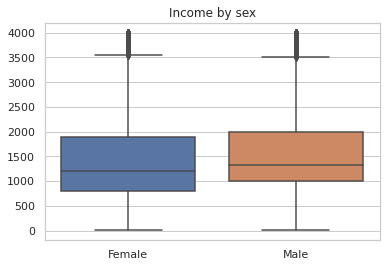

In [22]:
income_by_sex = sns.boxplot(x = subset.sex, y = subset.income)
income_by_sex.set(xlabel = '', ylabel = '', title = 'Income by sex')
income_by_sex

<AxesSubplot:title={'center':'Weekly working hours by sex'}>

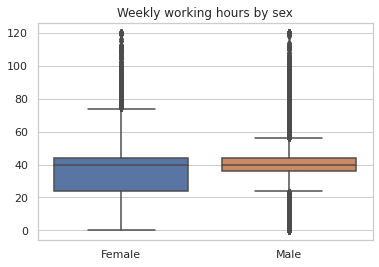

In [23]:
wwh_by_sex = sns.boxplot(x = subset.sex, y = subset.weekly_working_hours)
wwh_by_sex.set(xlabel = '', ylabel = '', title = 'Weekly working hours by sex')
wwh_by_sex

<AxesSubplot:title={'center':'Years in education by sex'}>

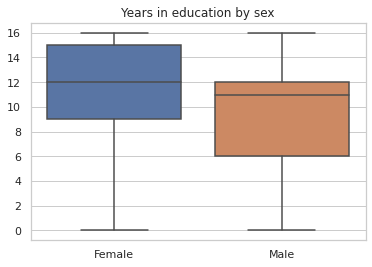

In [24]:
yos_by_sex = sns.boxplot(x = subset.sex, y = subset.years_in_education)
yos_by_sex.set(xlabel = '', ylabel = '', title = 'Years in education by sex')
yos_by_sex

<AxesSubplot:title={'center':'Income by skin color'}>

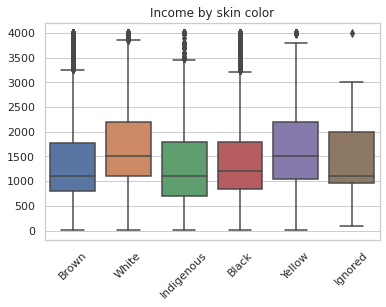

In [25]:
income_by_skin_color = sns.boxplot(x = subset.skin_color, y = subset.income)
income_by_skin_color.set(xlabel = '', ylabel = '', title = 'Income by skin color')
plt.xticks(rotation=45)
income_by_skin_color

<AxesSubplot:title={'center':'Weekly working hours by skin color'}>

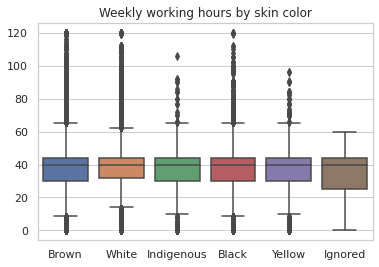

In [26]:
wwh_by_color = sns.boxplot(x = subset.skin_color, y = subset.weekly_working_hours)
wwh_by_color.set(xlabel = '', ylabel = '', title = 'Weekly working hours by skin color')
wwh_by_color

<AxesSubplot:title={'center':'Years in education by skin color'}>

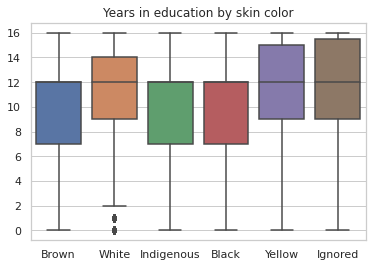

In [27]:
yos_by_color = sns.boxplot(x = subset.skin_color, y = subset.years_in_education)
yos_by_color.set(xlabel = '', ylabel = '', title = 'Years in education by skin color')
yos_by_color

In [28]:
wm = lambda x: np.average(x, weights=df.loc[x.index, "sample_weight"])

In [29]:
subset.groupby('sex').agg({'income' : wm})

,income
sex,
Female,1470.242180
Male,1644.442108


In [30]:
subset.groupby('skin_color').agg({'income' : wm})

,income
skin_color,
Black,1446.004201
Brown,1417.853932
Ignored,1289.566440
Indigenous,1464.944576
White,1765.412940
Yellow,1873.702900


In [31]:
subset.groupby(['sex']).agg({'weekly_working_hours' : wm})

,weekly_working_hours
sex,
Female,34.428798
Male,39.719600


In [32]:
grouped_income = subset.groupby('age').agg({'income' : wm})
grouped_income.reset_index(inplace = True)
grouped_income.head()

,age,income
0,18,939.819378
1,19,1049.541276
2,20,1157.956624
3,21,1228.607220
4,22,1295.468608


<AxesSubplot:title={'center':'Income by age'}, xlabel='Age', ylabel='Income Average'>

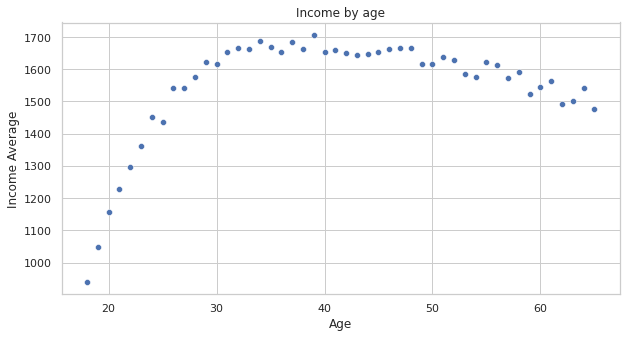

In [33]:
plt.figure(figsize = (10, 5))
income_by_age = sns.scatterplot(x = grouped_income.age, y = grouped_income.income)
income_by_age.set(xlabel = 'Age', ylabel = 'Income Average', title = 'Income by age')
income_by_age

In [34]:
grouped_wh = subset.groupby('weekly_working_hours').agg({'income' : wm})
grouped_wh.reset_index(inplace = True)
grouped_wh

,weekly_working_hours,income
0,0.0,1551.908680
1,1.0,1093.639285
2,2.0,613.959472
3,3.0,511.901812
4,4.0,600.874092
...,...,...
113,115.0,700.000000
114,116.0,3800.000000
115,118.0,1567.000000
116,119.0,1411.420920


<AxesSubplot:title={'center':'Income by weekly working hours'}, xlabel='Weekly working hours', ylabel='Income Average'>

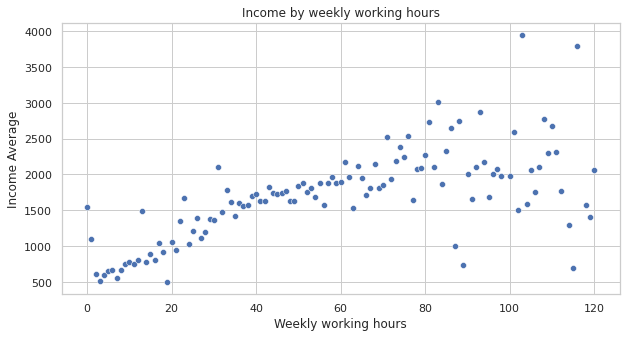

In [35]:
plt.figure(figsize = (10, 5))
income_by_wh = sns.scatterplot(x = grouped_wh.weekly_working_hours, y = grouped_wh.income)
income_by_wh.set(xlabel = 'Weekly working hours', ylabel = 'Income Average', title = 'Income by weekly working hours')
income_by_wh

In [36]:
grouped_st = subset.groupby('years_in_education').agg({'income' : wm})
grouped_st.reset_index(inplace = True)
grouped_st

,years_in_education,income
0,0.0,937.933011
1,1.0,1034.825880
2,2.0,945.634601
3,3.0,981.604315
4,4.0,1089.976700
5,5.0,1227.423655
6,6.0,1241.403722
7,7.0,1242.758415
8,8.0,1272.812158
9,9.0,1399.976264


<AxesSubplot:title={'center':'Income by instruction level'}, xlabel='Years in education', ylabel='Income Average'>

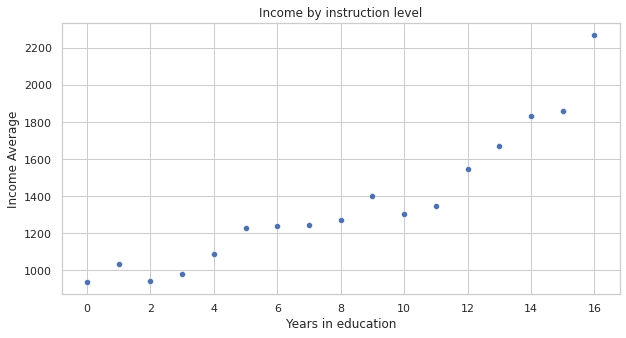

In [37]:
plt.figure(figsize = (10, 5))
income_by_st = sns.scatterplot(x = grouped_st.years_in_education, y = grouped_st.income)
income_by_st.set(xlabel = 'Years in education', ylabel = 'Income Average', title = 'Income by instruction level')
income_by_st

### Summary
- People in Brazil reach their wage peak between the age of 35 - 40 years
- The average number of working hours weekly are 40.
- Men tend to work around 7.5 hours more than women weekly.
- Women in average study 2 years more than man.
- Men earn slightly more than women

## Multivariate Analysis

In [38]:
grouped_three = subset.groupby(['skin_color', 'sex']).agg({'income' : wm})
grouped_three

income
skin_color sex                
Black      Female  1324.052977
           Male    1530.424289
Brown      Female  1307.775756
           Male    1491.639175
Ignored    Female  1492.415903
           Male    1115.824366
Indigenous Female  1403.698485
           Male    1505.392899
White      Female  1656.591191
           Male    1854.942696
Yellow     Female  1820.786083
           Male    1918.245435

<AxesSubplot:title={'center':'Income by skin color and sex'}, ylabel='Income'>

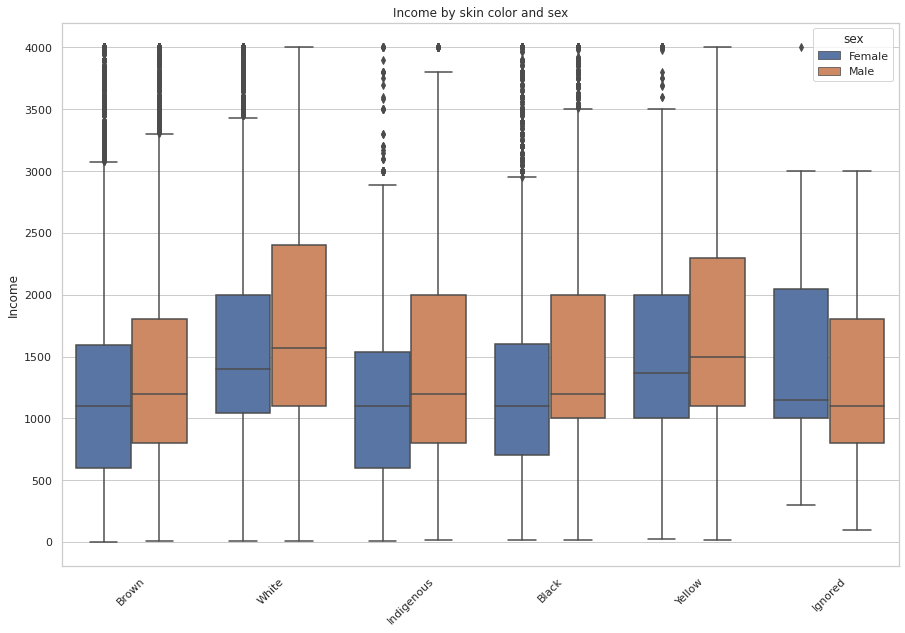

In [39]:
plt.figure(figsize = (15, 10))
income_by_skin_color_and_sex = sns.boxplot(x = subset.skin_color, y = subset.income, hue = subset.sex)
income_by_skin_color_and_sex.set(xlabel = '', ylabel = 'Income', title = 'Income by skin color and sex')
plt.xticks(rotation=45)
income_by_skin_color_and_sex

<AxesSubplot:title={'center':'Education by skin color and sex'}, ylabel='Years in education'>

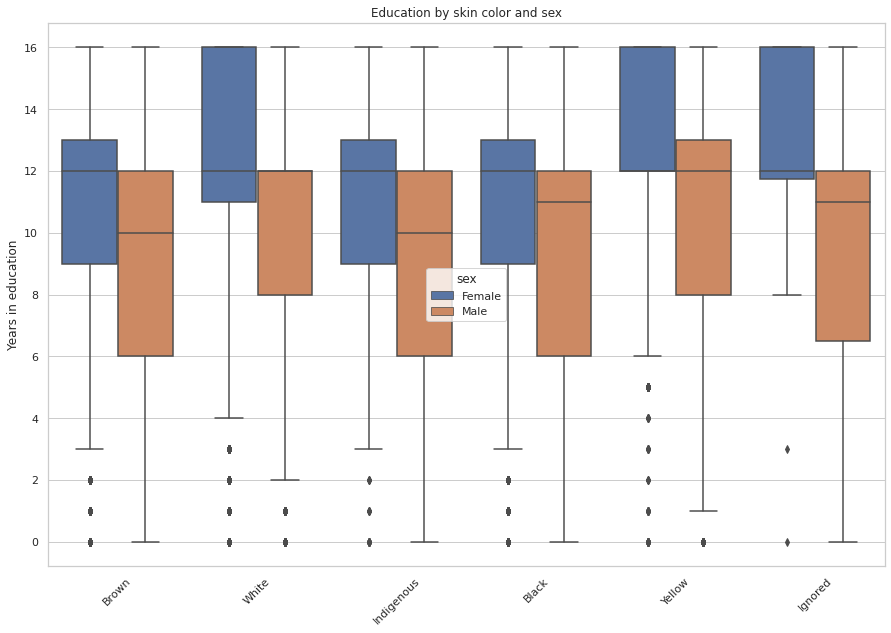

In [40]:
plt.figure(figsize = (15, 10))
education_by_skin_color_and_sex = sns.boxplot(x = subset.skin_color, y = subset.years_in_education, hue = subset.sex)
education_by_skin_color_and_sex.set(xlabel = '', ylabel = 'Years in education', title = 'Education by skin color and sex')
plt.xticks(rotation=45)
education_by_skin_color_and_sex

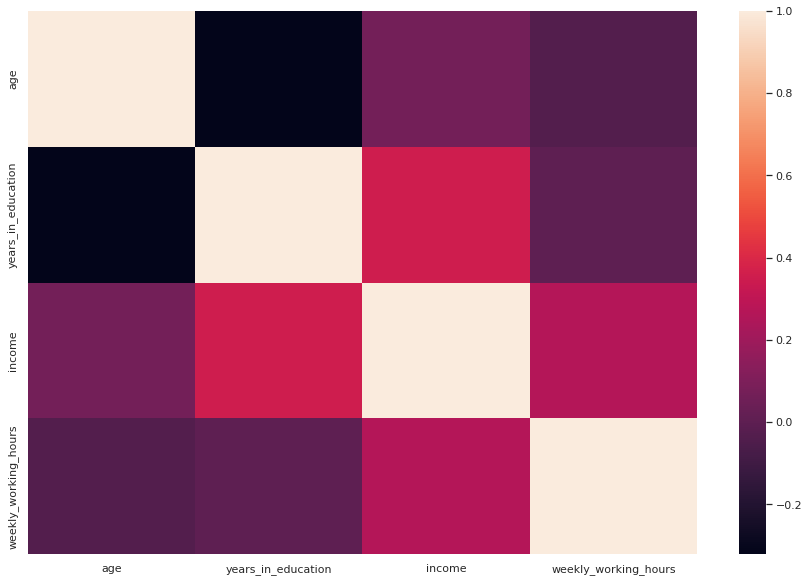

In [41]:
plt.figure(figsize = (15, 10))
sns.heatmap(subset[['age', 'years_in_education', 'income', 'weekly_working_hours']].corr());

### Summary
- The most impactful parameter for bigger earnings is the educational level. 
- Women from all ethnies, except indigenous, tends to keep studying after BSc level (12+ years in education). 
- Even being more educated, in average, women still earn considerably less than men.
- The vast majority of the population, brown (Parda) people, are the second most underpaid part of the population. Losing only for the indigenous population.


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

In [43]:
encoded = pd.get_dummies(subset[['uf', 'sex', 'skin_color', 'literate']])
encoded

,uf_Acre,uf_Alagoas,uf_Amapá,uf_Amazonas,uf_Bahia,uf_Ceará,uf_Distrito Federal,uf_EspÃ­rito Santo,uf_Goiás,uf_Maranhão,...,sex_Female,sex_Male,skin_color_Black,skin_color_Brown,skin_color_Ignored,skin_color_Indigenous,skin_color_White,skin_color_Yellow,literate_No,literate_Yes
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
12,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
14,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
16,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466383,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1466384,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1466385,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1466386,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [44]:
subset.drop(['uf', 'sex', 'skin_color', 'literate'], axis=1, inplace=True)
subset = subset.join(encoded)
subset

/home/blinder/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,year,age,years_in_education,income,weekly_working_hours,sample_weight,uf_Acre,uf_Alagoas,uf_Amapá,uf_Amazonas,...,sex_Female,sex_Male,skin_color_Black,skin_color_Brown,skin_color_Ignored,skin_color_Indigenous,skin_color_White,skin_color_Yellow,literate_No,literate_Yes
0,2021,39,5.0,1045.0,40.0,107.066353,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,2021,20,10.0,1045.0,40.0,107.066353,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
12,2021,51,12.0,1600.0,40.0,123.685250,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
14,2021,26,14.0,1045.0,48.0,123.685250,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
16,2021,55,12.0,1500.0,48.0,122.160361,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466383,2021,60,8.0,1200.0,44.0,22.616913,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1466384,2021,60,12.0,1000.0,44.0,22.616913,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1466385,2021,43,16.0,1100.0,44.0,30.221221,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1466386,2021,46,12.0,2000.0,40.0,30.221221,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [45]:
x_train, x_test, y_train, y_test = train_test_split(subset.drop(['income'], axis=1), subset['income'], random_state=4, test_size=0.2)

In [46]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns, index=x_test.index)

In [47]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_mae = mean_absolute_error(y_test, y_pred)
print(lr_rmse, lr_mae)

751.3323349873513 573.6079914245186


In [48]:
rf = RandomForestRegressor(n_estimators = 20)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_mae = mean_absolute_error(y_test, y_pred)
print(rf_rmse, rf_mae)

726.3858706750668 537.2628413331246


In [49]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
xgb.score(x_train, y_train)
y_pred = xgb.predict(x_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_mae = mean_absolute_error(y_test, y_pred)
print(xgb_rmse, xgb_mae)

710.4772790678561 530.5001106413832


In [56]:
results = {'rmse': [lr_rmse, rf_rmse, xgb_rmse], 'mae': [lr_mae, rf_mae, xgb_mae]}
results = pd.DataFrame(results, columns=['rmse', 'mae'], index=['linear_regression', 'random_forest', 'xgboost'])
results

,rmse,mae
linear_regression,751.332335,573.607991
random_forest,726.385871,537.262841
xgboost,710.477279,530.500111


<AxesSubplot:title={'center':'Regressors Performance'}>

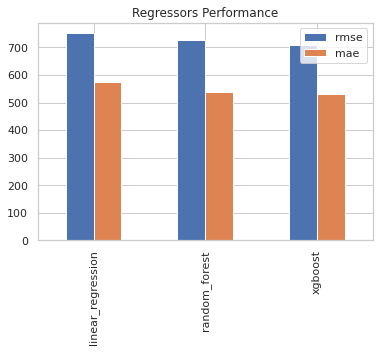

In [57]:
results.plot.bar(title='Regressors Performance')